# Project- Wrangle and Analyze Data of Twitter Archive @dog_rates

This project is based on the Twitter Handle 'We Rate Dogs' that rates people's dogs with a humorous comment about the dog. Data for the project has been gathered from multiple sources including twitter archives, Twitter API and json files. The analysis tries to identify the factors which influence the rating given to the dogs


Lets begin the project by gathering Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import os
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

The Data sets are gathered from 3 locations.
1. The csv file provided by the name 'twitter-archive-enhanced.csv'
2. Twitter API 
3. TSV file which have been generated having image predictions

In [2]:
# Accessing and saving the csv file in a dataframe
df_twt_archive= pd.read_csv('D:\\Farhan\\Data Analyst Nano degrre\\Data Wrangling\\Project\\twitter-archive-enhanced.csv')

In [3]:
df_twt_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [4]:
# Accessing image predictions file programmatically from the url
folder_name= 'Project 2'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)


In [5]:
r.status_code

200

In [6]:
r.headers['content-type']

'text/tab-separated-values; charset=utf-8'

In [7]:
r.encoding

'utf-8'

In [8]:
r.content

b"tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog\n666020888022790149\thttps://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg\t1\tWelsh_springer_spaniel\t0.465074\tTrue\tcollie\t0.156665\tTrue\tShetland_sheepdog\t0.0614285\tTrue\n666029285002620928\thttps://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg\t1\tredbone\t0.506826\tTrue\tminiature_pinscher\t0.07419169999999999\tTrue\tRhodesian_ridgeback\t0.07201\tTrue\n666033412701032449\thttps://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg\t1\tGerman_shepherd\t0.596461\tTrue\tmalinois\t0.13858399999999998\tTrue\tbloodhound\t0.11619700000000001\tTrue\n666044226329800704\thttps://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg\t1\tRhodesian_ridgeback\t0.408143\tTrue\tredbone\t0.360687\tTrue\tminiature_pinscher\t0.222752\tTrue\n666049248165822465\thttps://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg\t1\tminiature_pinscher\t0.560311\tTrue\tRottweiler\t0.243682\tTrue\tDoberman\t0.154629\tTrue\n666050758794694657\thttps://pbs.twimg.com/

In [9]:
with open (os.path.join(folder_name, url.split ('/')[-1]), mode='wb') as file:
    file.write(r.content)

In [10]:
# Saving the retrieved file in a dataframe
df_img_prediction= pd.read_csv('C:\\Users\\LENOVO\\Project 2\\image-predictions.tsv', sep='\t')

In [11]:
df_img_prediction.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [12]:
# Using text file tweet-json for twitter API data


In [13]:
df_list = []
tweet_json = 'D:\\Farhan\\Data Analyst Nano degrre\\Data Wrangling\\Project\\tweet-json.txt'

# Opening the text file and saving each line in lines[]
with open(tweet_json,'r',encoding='utf-8') as file:
    a =  file.read()
    lines = []
    line = ""
    for x in a:
        if x == '\n':
            lines.append(line)
            line = ""
        else:
            line += x

In [14]:
# # Variables in one line of the text file
# d.keys()

In [15]:
# Creating arrays for each variable (Only Certain variables were added keeping in mind the scope of the assignment i.e to identify 8 Quality and 2 tidiness issues)

Id = []
favourite_count = []
retweet_count = []
followers_count = []
coordinates = []
truncated= []
display_text_range= []
geo= []
entities=[]
lang=[]
#possibly_sensitive_appealable=[]

In [16]:
# Retrieving data from text file and saving in arrays
import json
for line in lines:
    d = json.loads(line)
    ID = d['id']
    fc = d['favorite_count']
    rc = d['retweet_count']
    tc= d['truncated']
#     follow_count = d['followers_count']
    coordinate = d['coordinates']
    disp= d['display_text_range']
    g=['geo']
    ent= d['entities']
    l=d['lang']
  #  psa= d['possibly_sensitive_appealable']
    Id.append(ID)
    favourite_count.append(fc)
    retweet_count.append(rc)
#     followers_count.append(follow_count)
    coordinates.append(coordinate)
    truncated.append(tc)
    display_text_range.append(disp)
    geo.append(g)
    entities.append(ent)
    lang.append(l)
 #   possibly_sensitive_appealable.append(psa)

In [17]:

d = json.loads(lines[1])

In [18]:
d.keys()

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])

In [19]:
d['retweet_count']

6514

In [20]:
# Creating data frame
df = pd.DataFrame(list(zip(Id, favourite_count,retweet_count,coordinates,truncated, display_text_range, geo,entities, lang)))

In [21]:
# Number of arrays in each array created
#len(Id), len(retweet_count), len(coordinates), len(favourite_count)

In [22]:
# The combined data frame
df

0      1     2     3      4         5      6  \
0     892420643555336193  39467  8853  None  False   [0, 85]  [geo]   
1     892177421306343426  33819  6514  None  False  [0, 138]  [geo]   
2     891815181378084864  25461  4328  None  False  [0, 121]  [geo]   
3     891689557279858688  42908  8964  None  False   [0, 79]  [geo]   
4     891327558926688256  41048  9774  None  False  [0, 138]  [geo]   
...                  ...    ...   ...   ...    ...       ...    ...   
2349  666049248165822465    111    41  None  False  [0, 120]  [geo]   
2350  666044226329800704    311   147  None  False  [0, 137]  [geo]   
2351  666033412701032449    128    47  None  False  [0, 130]  [geo]   
2352  666029285002620928    132    48  None  False  [0, 139]  [geo]   
2353  666020888022790149   2535   532  None  False  [0, 131]  [geo]   

                                                      7   8  
0     {'hashtags': [], 'symbols': [], 'user_mentions...  en  
1     {'hashtags': [], 'symbols': [], 'user_mentions...  en  
2     {'hashtags': [], 'symbols': [], 'user_mentions...  en  
3     {'hashtags': [], 'symbols': [], 'user_mentions...  en  
4     {'hashtags': [{'text': 'BarkWeek', 'indices': ...  en  
...                                                 ...  ..  
2349  {'hashtags': [], 'symbols': [], 'user_mentions...  en  
2350  {'hashtags': [], 'symbols': [], 'user_mentions...  en  
2351  {'hashtags': [], 'symbols': [], 'user_mentions...  en  
2352  {'hashtags': [], 'symbols': [], 'user_mentions...  en  
2353  {'hashtags': [], 'symbols': [], 'user_mentions...  en  

[2354 rows x 9 columns]

In [23]:
# Renaming columns in data frame
df= df.rename({0: 'tweet_id', 1: 'favourite_count', 2: 'retweet_count', 3: 'coordinates', 4: 'truncated', 5: 'display_text_range', 6: 'geo', 7: 'entities', 8: 'lang'}, axis=1)


In [24]:
df.head()

tweet_id  favourite_count  retweet_count coordinates  truncated  \
0  892420643555336193            39467           8853        None      False   
1  892177421306343426            33819           6514        None      False   
2  891815181378084864            25461           4328        None      False   
3  891689557279858688            42908           8964        None      False   
4  891327558926688256            41048           9774        None      False   

  display_text_range    geo  \
0            [0, 85]  [geo]   
1           [0, 138]  [geo]   
2           [0, 121]  [geo]   
3            [0, 79]  [geo]   
4           [0, 138]  [geo]   

                                            entities lang  
0  {'hashtags': [], 'symbols': [], 'user_mentions...   en  
1  {'hashtags': [], 'symbols': [], 'user_mentions...   en  
2  {'hashtags': [], 'symbols': [], 'user_mentions...   en  
3  {'hashtags': [], 'symbols': [], 'user_mentions...   en  
4  {'hashtags': [{'text': 'BarkWeek', 'indices': ...   en

Now we have accessed each of the data source, the next stage is to combine each of the dataframes into one single data frame

Merging of Data frames have been done currenlt so as to eliminate the issues of missing data from the other files. The combine file would only have unique tweet id's and corresponding information in it. We have bypassed many an issue arising of missing values

In [25]:
# Merging df_twt_archive and df_img_prediction to df_1

df_1=  pd.merge(df_twt_archive, df_img_prediction, on= 'tweet_id' )



In [26]:
# Combining df_1 and df to df_master
df_master= pd.merge(df, df_1, on= 'tweet_id' )


In [27]:
df_master.head()

tweet_id  favourite_count  retweet_count coordinates  truncated  \
0  892420643555336193            39467           8853        None      False   
1  892177421306343426            33819           6514        None      False   
2  891815181378084864            25461           4328        None      False   
3  891689557279858688            42908           8964        None      False   
4  891327558926688256            41048           9774        None      False   

  display_text_range    geo  \
0            [0, 85]  [geo]   
1           [0, 138]  [geo]   
2           [0, 121]  [geo]   
3            [0, 79]  [geo]   
4           [0, 138]  [geo]   

                                            entities lang  \
0  {'hashtags': [], 'symbols': [], 'user_mentions...   en   
1  {'hashtags': [], 'symbols': [], 'user_mentions...   en   
2  {'hashtags': [], 'symbols': [], 'user_mentions...   en   
3  {'hashtags': [], 'symbols': [], 'user_mentions...   en   
4  {'hashtags': [{'text': 'BarkWeek', 'indices': ...   en   

   in_reply_to_status_id  ...  img_num           p1   p1_conf p1_dog  \
0                    NaN  ...        1       orange  0.097049  False   
1                    NaN  ...        1    Chihuahua  0.323581   True   
2                    NaN  ...        1    Chihuahua  0.716012   True   
3                    NaN  ...        1  paper_towel  0.170278  False   
4                    NaN  ...        2       basset  0.555712   True   

                   p2   p2_conf p2_dog                           p3   p3_conf  \
0               bagel  0.085851  False                       banana  0.076110   
1            Pekinese  0.090647   True                     papillon  0.068957   
2            malamute  0.078253   True                       kelpie  0.031379   
3  Labrador_retriever  0.168086   True                      spatula  0.040836   
4    English_springer  0.225770   True  German_short-haired_pointer  0.175219   

   p3_dog  
0   False  
1    True  
2    True  
3   False  
4    True  

[5 rows x 36 columns]

In [28]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   favourite_count             2073 non-null   int64  
 2   retweet_count               2073 non-null   int64  
 3   coordinates                 0 non-null      object 
 4   truncated                   2073 non-null   bool   
 5   display_text_range          2073 non-null   object 
 6   geo                         2073 non-null   object 
 7   entities                    2073 non-null   object 
 8   lang                        2073 non-null   object 
 9   in_reply_to_status_id       23 non-null     float64
 10  in_reply_to_user_id         23 non-null     float64
 11  timestamp                   2073 non-null   object 
 12  source                      2073 non-null   object 
 13  text                        2073 

In [29]:
# To visually assess Data issues
df_master.to_csv('combined_file1.csv')

In [30]:
df_master.dtypes

tweet_id                        int64
favourite_count                 int64
retweet_count                   int64
coordinates                    object
truncated                        bool
display_text_range             object
geo                            object
entities                       object
lang                           object
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
jpg_url                        object
img_num     

In [31]:
df_master.describe

<bound method NDFrame.describe of                 tweet_id  favourite_count  retweet_count coordinates  \
0     892420643555336193            39467           8853        None   
1     892177421306343426            33819           6514        None   
2     891815181378084864            25461           4328        None   
3     891689557279858688            42908           8964        None   
4     891327558926688256            41048           9774        None   
...                  ...              ...            ...         ...   
2068  666049248165822465              111             41        None   
2069  666044226329800704              311            147        None   
2070  666033412701032449              128             47        None   
2071  666029285002620928              132             48        None   
2072  666020888022790149             2535            532        None   

      truncated display_text_range    geo  \
0         False            [0, 85]  [geo]   
1         F

Next Step is to Clean the Data. Before stepping into cleaning Lets divide the issues into Quality and Tidiness

After visual and programmatic assesment, the issues identified were

#### Quality
1. Column 'coordinates' are empty which are not valuable to the analysis
2. Column 'Truncated' is having the same entry "False" which also wont contribute to the analysis
3. Column ' Text' has a url attached to some cells at the end of each entry which needs to be removed
4. Certain entries in favorite_count are zero especially when the corresponding retweet_count is a high value
5. Column 'lang' represents each language which are entered as an abbreviation and needs to be converted into the original version
6. Certain columns needs to be renamed (lang) for better readabilit
7. Column 'geo' has similar values which does not add to the analysis
8. White space usage needs to be standardised in column p1 (some uses -, while some other _)
9. Text column has ratings which needs to be removed



### Tidiness

1. Dog Stages are divided  into various columns which needs to be combined into one column named 'Dog_Stage' which shows the stage (doggo, floof etc)
2. The Numerator and Dinominator values needs to be divided so as to create a column named rating which would be a vital element in the analysis

In [32]:
df_master_clean = df_master.copy()

### Cleaning Quality Issues

In [33]:
# Dropping Column ' Coordinates' , 'Truncated, 'geo'

df_master_clean=df_master_clean.drop(['coordinates', 'truncated', 'geo'], axis=1)

In [34]:
# Identifying rows having zero favorite_count but higher retweet_count
(df_master_clean.query(' favourite_count == 0 and retweet_count>= 0 ')['retweet_count'])

# Here it is assumed that the number of retweets would be equal to favories hence the value of retweets are copied into favorite_counts

32      19297
67         83
81      12518
109       135
129     37911
        ...  
757      9193
775     18963
1035      138
1977       37
1978       34
Name: retweet_count, Length: 79, dtype: int64

In [35]:
x = df_master_clean['favourite_count']
y = df_master_clean['retweet_count']

In [36]:
z = []
for i in range(len(x)):
    if x[i] == 0:
        z.append(y[i])
    else:
        z.append(x[i])

In [37]:
df_master_clean['favourite_count']=z

In [38]:
# Check for columns with 'favorite_count= 0'
df_master_clean[df_master_clean['favourite_count']==0]

Empty DataFrame
Columns: [tweet_id, favourite_count, retweet_count, display_text_range, entities, lang, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []

[0 rows x 33 columns]

In [39]:
# Renaming Column Names

df_master_clean= df_master_clean.rename({'lang' : 'language'}, axis=1)
df_master_clean.columns

Index(['tweet_id', 'favourite_count', 'retweet_count', 'display_text_range',
       'entities', 'language', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

In [40]:
# The Entries in languages column needs to be revised for better readability
# en -> english
# nl -> Dutch
# eu -> European (any language in European Union)
# et -> Estonian
# ro-> Romanian
# in -> Hindi
df_master_clean['language'].value_counts()

en    2065
nl       3
in       2
eu       1
et       1
ro       1
Name: language, dtype: int64

In [41]:
df_master_clean['language'] = df_master_clean['language'].str.replace('en','English')
df_master_clean['language'] = df_master_clean['language'].str.replace('nl','Dutch')
df_master_clean['language'] = df_master_clean['language'].str.replace('eu','European')
df_master_clean['language'] = df_master_clean['language'].str.replace('et','Estonian')
df_master_clean['language'] = df_master_clean['language'].str.replace('ro','Romanian')

In [42]:
df_master_clean['language'].value_counts()

English           2065
Dutch                3
in                   2
Estonian             1
Romanian             1
EuRomanianpean       1
Name: language, dtype: int64

In [43]:
df_master_clean['language'] = df_master_clean['language'].str.replace('in','Hindi')
df_master_clean['language'] = df_master_clean['language'].str.replace('EuRomanianpean','European')

In [44]:
df_master_clean['language'].value_counts()

English     2065
Dutch          3
Hindi          2
Estonian       1
European       1
Romanian       1
Name: language, dtype: int64

In [45]:
df_master_clean['language'] = df_master_clean['language'].str.replace('Englishglish','English')

In [46]:
df_master_clean['language'].value_counts()

English     2065
Dutch          3
Hindi          2
Estonian       1
European       1
Romanian       1
Name: language, dtype: int64

In [47]:
# Replacing the white space usage in column 'p1'
df_master_clean['p1'] = df_master_clean['p1'].str.replace(' ','_')
df_master_clean['p1'] = df_master_clean['p1'].str.replace('-','_')

In [48]:
df_master_clean['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               88
Chihuahua              83
pug                    57
                     ... 
pillow                  1
pot                     1
boathouse               1
Japanese_spaniel        1
water_buffalo           1
Name: p1, Length: 378, dtype: int64

In [49]:
# removing url's from the column 'text'
import re
df_master_clean['text'] = df_master_clean['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [50]:
df_master_clean['text']

0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
                              ...                        
2068    Here we have a 1949 1st generation vulpix. Enj...
2069    This is a purebred Piers Morgan. Loves to Netf...
2070    Here is a very happy pup. Big fan of well-main...
2071    This is a western brown Mitsubishi terrier. Up...
2072    Here we have a Japanese Irish Setter. Lost eye...
Name: text, Length: 2073, dtype: object

In [51]:
# for visual examination in spreadsheet
df_master_clean['text'].to_csv('text_column.csv')

In [52]:
# After visual examination it was identified that text column has ratings which had to be removed

df_master_clean['text_edit'] = df_master_clean['text'].apply(lambda x: re.sub("[0-9]|[/]", "", x) )

In [53]:
df_master_clean['text']=df_master_clean['text_edit']

In [54]:
df_master_clean.to_csv('text_edt.csv')

### Cleaning Tidiness Issues

In [55]:
df_master_clean['Rating']= df_master_clean['rating_numerator']/ df_master_clean['rating_denominator']

In [56]:
# Visually Assess Rating Column
df_master_clean['Rating'].to_csv('text_edt.csv')

In [57]:
# After assessing one particular value was found to be 177.6 which is an error. It is most probably 1.7
df_master_clean[df_master_clean['Rating']== 177.6]

tweet_id  favourite_count  retweet_count display_text_range  \
802  749981277374128128             5569           2772            [0, 54]   

                                              entities language  \
802  {'hashtags': [], 'symbols': [], 'user_mentions...  English   

     in_reply_to_status_id  in_reply_to_user_id                  timestamp  \
802                    NaN                  NaN  2016-07-04 15:00:45 +0000   

                                                source  ...   p1_conf  p1_dog  \
802  <a href="https://about.twitter.com/products/tw...  ...  0.533941   False   

             p2   p2_conf p2_dog        p3   p3_conf p3_dog  \
802  sunglasses  0.080822  False  sunglass  0.050776  False   

                                            text_edit Rating  
802  This is Atticus. He's quite simply America af.    177.6  

[1 rows x 35 columns]

In [58]:
# Changing that value to 1.7

df_master_clean['Rating'][df_master_clean['Rating'] == 177.6]=1.7

C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [59]:
# Checking for Change
df_master_clean[df_master_clean['tweet_id']== 749981277374128128]

tweet_id  favourite_count  retweet_count display_text_range  \
802  749981277374128128             5569           2772            [0, 54]   

                                              entities language  \
802  {'hashtags': [], 'symbols': [], 'user_mentions...  English   

     in_reply_to_status_id  in_reply_to_user_id                  timestamp  \
802                    NaN                  NaN  2016-07-04 15:00:45 +0000   

                                                source  ...   p1_conf  p1_dog  \
802  <a href="https://about.twitter.com/products/tw...  ...  0.533941   False   

             p2   p2_conf p2_dog        p3   p3_conf p3_dog  \
802  sunglasses  0.080822  False  sunglass  0.050776  False   

                                            text_edit Rating  
802  This is Atticus. He's quite simply America af.      1.7  

[1 rows x 35 columns]

In [60]:
df_master_clean.columns

Index(['tweet_id', 'favourite_count', 'retweet_count', 'display_text_range',
       'entities', 'language', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'text_edit', 'Rating'],
      dtype='object')

In [61]:
df_master_clean.dtypes

tweet_id                        int64
favourite_count                 int64
retweet_count                   int64
display_text_range             object
entities                       object
language                       object
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
jpg_url                        object
img_num                         int64
p1                             object
p1_conf                       float64
p1_dog      

In [62]:
# Concatenating Columns of different stages of dogs into one column
df_master_clean['stage']= df_master_clean['doggo']+df_master_clean['floofer']+df_master_clean['pupper']+df_master_clean['puppo']

In [63]:
df_master_clean['stage'].value_counts()

NoneNoneNoneNone        1753
NoneNonepupperNone       210
doggoNoneNoneNone         67
NoneNoneNonepuppo         23
doggoNonepupperNone       11
NoneflooferNoneNone        7
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: stage, dtype: int64

In [64]:
# Replacing 'None' with an empty string
df_master_clean['stage'] = df_master_clean['stage'].str.replace('None','')

In [65]:
df_master_clean['stage'].value_counts()

                1753
pupper           210
doggo             67
puppo             23
doggopupper       11
floofer            7
doggofloofer       1
doggopuppo         1
Name: stage, dtype: int64

In [66]:
# There are 1753 entries which had an empty string which are the dogs whose stages were not entered.
df_master_clean.loc[(df_master_clean.stage == ''),'stage']='Not Specified'

In [67]:
df_master_clean['stage'].value_counts()

Not Specified    1753
pupper            210
doggo              67
puppo              23
doggopupper        11
floofer             7
doggofloofer        1
doggopuppo          1
Name: stage, dtype: int64

In [68]:
# The stages had entries like "doggopupper", 'doggofloofer' and 'doggopuppo' which needs to be converted


df_master_clean.loc[(df_master_clean.stage == 'doggopupper'),'stage']='doggo'
df_master_clean.loc[(df_master_clean.stage == 'doggofloofer'),'stage']='doggo'
df_master_clean.loc[(df_master_clean.stage == 'doggopuppo'),'stage']='doggo'



In [69]:
#df_master_clean[df_master_clean['stage']== '']=' Not Specified'

#  The Data frame used for further analysis would be 

In [70]:
df_master_clean.head()

tweet_id  favourite_count  retweet_count display_text_range  \
0  892420643555336193            39467           8853            [0, 85]   
1  892177421306343426            33819           6514           [0, 138]   
2  891815181378084864            25461           4328           [0, 121]   
3  891689557279858688            42908           8964            [0, 79]   
4  891327558926688256            41048           9774           [0, 138]   

                                            entities language  \
0  {'hashtags': [], 'symbols': [], 'user_mentions...  English   
1  {'hashtags': [], 'symbols': [], 'user_mentions...  English   
2  {'hashtags': [], 'symbols': [], 'user_mentions...  English   
3  {'hashtags': [], 'symbols': [], 'user_mentions...  English   
4  {'hashtags': [{'text': 'BarkWeek', 'indices': ...  English   

   in_reply_to_status_id  in_reply_to_user_id                  timestamp  \
0                    NaN                  NaN  2017-08-01 16:23:56 +0000   
1                    NaN                  NaN  2017-08-01 00:17:27 +0000   
2                    NaN                  NaN  2017-07-31 00:18:03 +0000   
3                    NaN                  NaN  2017-07-30 15:58:51 +0000   
4                    NaN                  NaN  2017-07-29 16:00:24 +0000   

                                              source  ... p1_dog  \
0  <a href="http://twitter.com/download/iphone" r...  ...  False   
1  <a href="http://twitter.com/download/iphone" r...  ...   True   
2  <a href="http://twitter.com/download/iphone" r...  ...   True   
3  <a href="http://twitter.com/download/iphone" r...  ...  False   
4  <a href="http://twitter.com/download/iphone" r...  ...   True   

                   p2   p2_conf p2_dog                           p3   p3_conf  \
0               bagel  0.085851  False                       banana  0.076110   
1            Pekinese  0.090647   True                     papillon  0.068957   
2            malamute  0.078253   True                       kelpie  0.031379   
3  Labrador_retriever  0.168086   True                      spatula  0.040836   
4    English_springer  0.225770   True  German_short-haired_pointer  0.175219   

   p3_dog                                          text_edit Rating  \
0   False  This is Phineas. He's a mystical boy. Only eve...    1.3   
1    True  This is Tilly. She's just checking pup on you....    1.3   
2    True  This is Archie. He is a rare Norwegian Pouncin...    1.2   
3   False  This is Darla. She commenced a snooze mid meal...    1.3   
4    True  This is Franklin. He would like you to stop ca...    1.2   

           stage  
0  Not Specified  
1  Not Specified  
2  Not Specified  
3  Not Specified  
4  Not Specified  

[5 rows x 36 columns]

In [71]:
df_master_clean.columns

Index(['tweet_id', 'favourite_count', 'retweet_count', 'display_text_range',
       'entities', 'language', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'text_edit', 'Rating', 'stage'],
      dtype='object')

In [72]:
df_master_clean.to_csv('text_edt.csv')

In [73]:
df_master_clean.drop(['display_text_range','entities','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','text_edit'], axis = 1) 

tweet_id  favourite_count  retweet_count language  \
0     892420643555336193            39467           8853  English   
1     892177421306343426            33819           6514  English   
2     891815181378084864            25461           4328  English   
3     891689557279858688            42908           8964  English   
4     891327558926688256            41048           9774  English   
...                  ...              ...            ...      ...   
2068  666049248165822465              111             41  English   
2069  666044226329800704              311            147  English   
2070  666033412701032449              128             47  English   
2071  666029285002620928              132             48  English   
2072  666020888022790149             2535            532  English   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2068  2015-11-16 00:24:50 +0000   
2069  2015-11-16 00:04:52 +0000   
2070  2015-11-15 23:21:54 +0000   
2071  2015-11-15 23:05:30 +0000   
2072  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2068  <a href="http://twitter.com/download/iphone" r...   
2069  <a href="http://twitter.com/download/iphone" r...   
2070  <a href="http://twitter.com/download/iphone" r...   
2071  <a href="http://twitter.com/download/iphone" r...   
2072  <a href="http://twitter.com/download/iphone" r...   

                                                   text  \
0     This is Phineas. He's a mystical boy. Only eve...   
1     This is Tilly. She's just checking pup on you....   
2     This is Archie. He is a rare Norwegian Pouncin...   
3     This is Darla. She commenced a snooze mid meal...   
4     This is Franklin. He would like you to stop ca...   
...                                                 ...   
2068  Here we have a  st generation vulpix. Enjoys s...   
2069  This is a purebred Piers Morgan. Loves to Netf...   
2070  Here is a very happy pup. Big fan of well-main...   
2071  This is a western brown Mitsubishi terrier. Up...   
2072  Here we have a Japanese Irish Setter. Lost eye...   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitter.com/dog_rates/status/891689557...                13   
4     https://twitter.com/dog_rates/status/891327558...                12   
...                                                 ...               ...   
2068  https://twitter.com/dog_rates/status/666049248...                 5   
2069  https://twitter.com/dog_rates/status/666044226...                 6   
2070  https://twitter.com/dog_rates/status/666033412...                 9   
2071  https://twitter.com/dog_rates/status/666029285...                 7   
2072  https://twitter.com/dog_rates/status/666020888...                 8   

      rating_denominator  ...   p1_conf p1_dog                  p2   p2_conf  \
0                     10  ...  0.097049  False               bagel  0.085851   
1                     10  ...  0.323581   True            Pekinese  0.090647   
2                     10  ...  0.716012   True            malamute  0.078253   
3                     10  ...  0.170278  False  Labrador_retriever  0.168086   
4                     1

### Insights

In [74]:
df_master_clean.groupby(['stage']).count()['favourite_count']

stage
Not Specified    1753
doggo              80
floofer             7
pupper            210
puppo              23
Name: favourite_count, dtype: int64

Pupper was the most frequent which was rated in the twitter feed of the dogs whose stage were specified
The stage whose column is null was not specified which stage it belonged to on the twitter archive

In [75]:
# Average p1_config values
avg_p1_config= df_master_clean['p1_conf'].mean()
avg_p1_config

0.5945316507477092

In [76]:
# Average p2_config values
avg_p2_config= df_master_clean['p2_conf'].mean()
avg_p2_config

0.13466650912364345

In [77]:
# Average p3_config values
avg_p3_config= df_master_clean['p3_conf'].mean()
avg_p3_config

0.06034004557769946

Average confidence in which each of these were predicted are 59% at first try, 13% at second try and 6% at third try

In [78]:
#Relation between Favorite Count and Rating
df_master_clean['intercept']=1

lm=sm.OLS(df_master_clean['Rating'],df_master_clean[['intercept','favourite_count']])
results=lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     17.82
Date:                Mon, 11 May 2020   Prob (F-statistic):           2.54e-05
Time:                        22:41:56   Log-Likelihood:                -2800.9
No. Observations:                2073   AIC:                             5606.
Df Residuals:                    2071   BIC:                             5617.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept           1.0217      0.025     40.147      0.000       0.972       1.072
favourite_count  7.152e-06   1.69e-06      4.221      0.000    3.83e-06    1.05e-05
==============================================================================
Omnibus:                     6138.599   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        271807608.809
Skew:                          40.652   Prob(JB):                         0.00
Kurtosis:                    1775.067   Cond. No.                     1.86e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Relation between favorite count and rating was found to be very weak

## Visualization

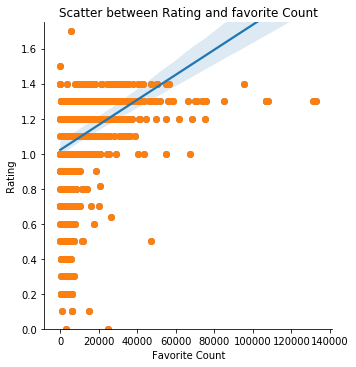

<Figure size 432x288 with 0 Axes>

In [79]:
sns.lmplot(x='favourite_count',y='Rating',data=df_master_clean,fit_reg=True)

plt.scatter(df_master_clean['favourite_count'], df_master_clean['Rating']) 
plt.title('Scatter between Rating and favorite Count')
plt.xlabel('Favorite Count')
plt.ylabel(' Rating ')
plt.ylim(0,1.75)
plt.show()
plt.savefig("Scatter.png", format="png")

Plot shows that there is a relation between favorite count and the rating of the dogs

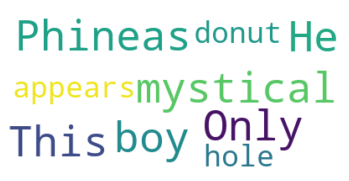

In [80]:
# Basic word cloud were calculated for the first 5 data entries

from wordcloud import WordCloud , STOPWORDS, ImageColorGenerator 

text = df_master_clean.text[0]
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
wordcloud = WordCloud(max_font_size=50, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud.to_file("1.png")

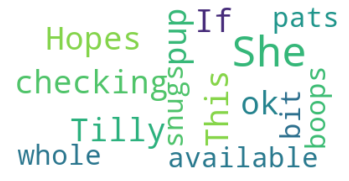

In [81]:
text = df_master_clean.text[1]
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)
# Display the generated image:
wordcloud = WordCloud(max_font_size=50, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("2.png")

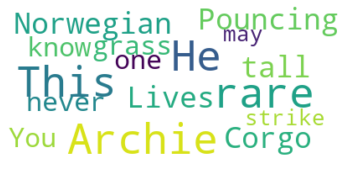

In [82]:
text = df_master_clean.text[2]
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)
# Display the generated image:
wordcloud = WordCloud(max_font_size=50, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("3.png")

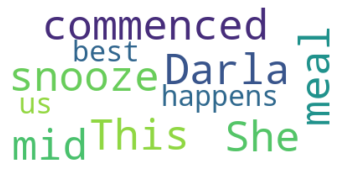

In [83]:
text = df_master_clean.text[3]
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)
# Display the generated image:
wordcloud = WordCloud(max_font_size=50, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("4.png")

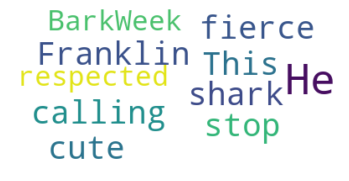

In [84]:
text = df_master_clean.text[4]
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)
# Display the generated image:
wordcloud = WordCloud(max_font_size=50, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("5.png")

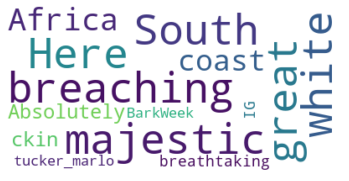

In [85]:
text = df_master_clean.text[5]
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)
# Display the generated image:
wordcloud = WordCloud(max_font_size=50, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("6.png")

In [86]:
df_master_clean.columns

Index(['tweet_id', 'favourite_count', 'retweet_count', 'display_text_range',
       'entities', 'language', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'text_edit', 'Rating', 'stage', 'intercept'],
      dtype='object')

The visualizations done were for the first few dogs in the data frame. These could have been related to the ratings so as to find which words corresponded to better ratings 